In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
import scipy

# Creación del Data Frame en pandas

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

## Análisis exploratorio del dataset

Vemos que observaciones tiene el dataset.

In [3]:
for col in df.columns.tolist():
    print(col)

PatientID
Age
Gender
Ethnicity
EducationLevel
BMI
Smoking
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
FamilyHistoryAlzheimers
CardiovascularDisease
Diabetes
Depression
HeadInjury
Hypertension
SystolicBP
DiastolicBP
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
MMSE
FunctionalAssessment
MemoryComplaints
BehavioralProblems
ADL
Confusion
Disorientation
PersonalityChanges
DifficultyCompletingTasks
Forgetfulness
Diagnosis
DoctorInCharge


# **Búsquda de correlaciones interesantes**

El dataset tiene varios datos que me parecen interesantes para investigar y correlacionar:

👉 Primero, en cuanto a condiciones generales que la persona no puede controlar, como edad, género, etnia, etc.
1. ¿Existe alguna relación entre la edad y la pérdida de memoria?
2. ¿Y entre la etnia y la pérdida de memoria?
3. ¿Estudiar más puede causar Alzheimer?

👉 En segundo lugar, factores de comportamiento que pueden afectar la probabilidad de generar alzheimer:
1. ¿Exite correlación entre el índice de masa corporal y AZ?
2. ¿Fumar aumenta las chances de generar una enfermedad neurodegenerativa?
3. ¿Y el consumo de alcohol?
4. ¿Hacer actividad física disminuye las chances?
5. ¿Cómo influye la dieta en el proceso neurodegenerativo?
6. ¿Qué rol juega la calidad del sueño?

👉 Finalmente, pero no menos importante, ¿qué papel juegan otras patologías en el diagnóstico del alzhaimer?
1. Correlaciones entre alzhaimer y la diabetes
2. Depresión y alzhaimer
3. Hipertensión, colesterol y enferemedades cardiovasculares relacionadas con el alzhaimer

## Vemos si hay valores nulos

In [4]:
df.isnull().any()

PatientID                    False
Age                          False
Gender                       False
Ethnicity                    False
EducationLevel               False
BMI                          False
Smoking                      False
AlcoholConsumption           False
PhysicalActivity             False
DietQuality                  False
SleepQuality                 False
FamilyHistoryAlzheimers      False
CardiovascularDisease        False
Diabetes                     False
Depression                   False
HeadInjury                   False
Hypertension                 False
SystolicBP                   False
DiastolicBP                  False
CholesterolTotal             False
CholesterolLDL               False
CholesterolHDL               False
CholesterolTriglycerides     False
MMSE                         False
FunctionalAssessment         False
MemoryComplaints             False
BehavioralProblems           False
ADL                          False
Confusion           

Podemos notar que este dataset no contiene datos nulos.

## Visualización general del dataset

> 👉 Trato de responder esta pregunta: ¿Cómo está compuesto este dataset?

Vemos la media de edad en el grupo de pacientes estudiado.

In [5]:
age_group = np.array(df['Age'])

In [6]:
mean_age = age_group.mean()

print(f"La edad media de los pacientes es: {mean_age}")

La edad media de los pacientes es: 74.90879478827361


Graficamos las edades para ver si sigue una distribución normal.

In [7]:
bins = range(int(age_group.min()), int(age_group.max()) + 2)

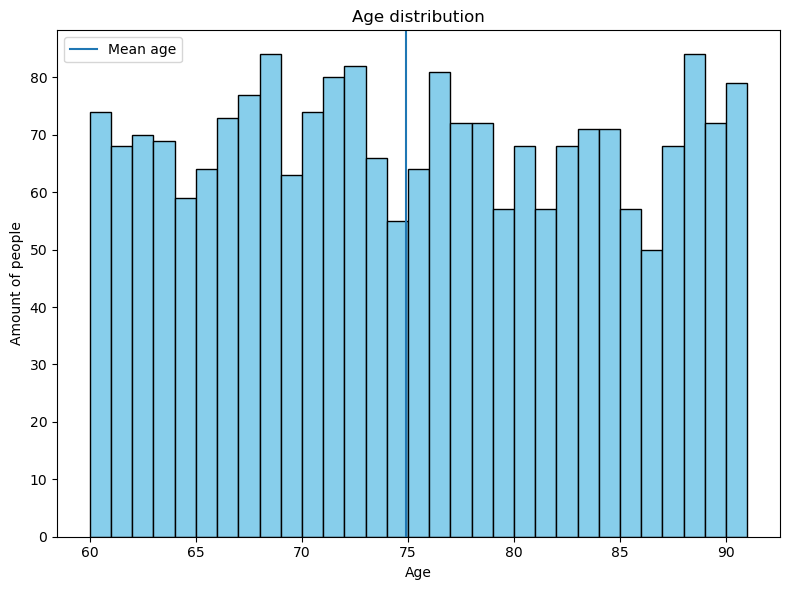

In [8]:
plt.figure(figsize=(8,6))
plt.hist(age_group, color='skyblue', edgecolor='black', bins=bins)

plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Amount of people')
plt.axvline(mean_age, label='Mean age')
plt.legend()
plt.tight_layout()

In [9]:
df['Age'].describe()

count    2149.000000
mean       74.908795
std         8.990221
min        60.000000
25%        67.000000
50%        75.000000
75%        83.000000
max        90.000000
Name: Age, dtype: float64

- Podemos ver que se trata de un grupo etario de adultos mayores con una buena distribución de edades.
- La media y la mediana son similares, por lo que se trata de una **distribución estadística simétrica**
- La mayor parte de los datos se concentran en el intervalo de 67 a 83 años.

Ahora analizamos la distribución de géneros 


In [10]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
1    1088
0    1061
Name: count, dtype: int64


Text(0.5, 1.0, 'Gender proportions')

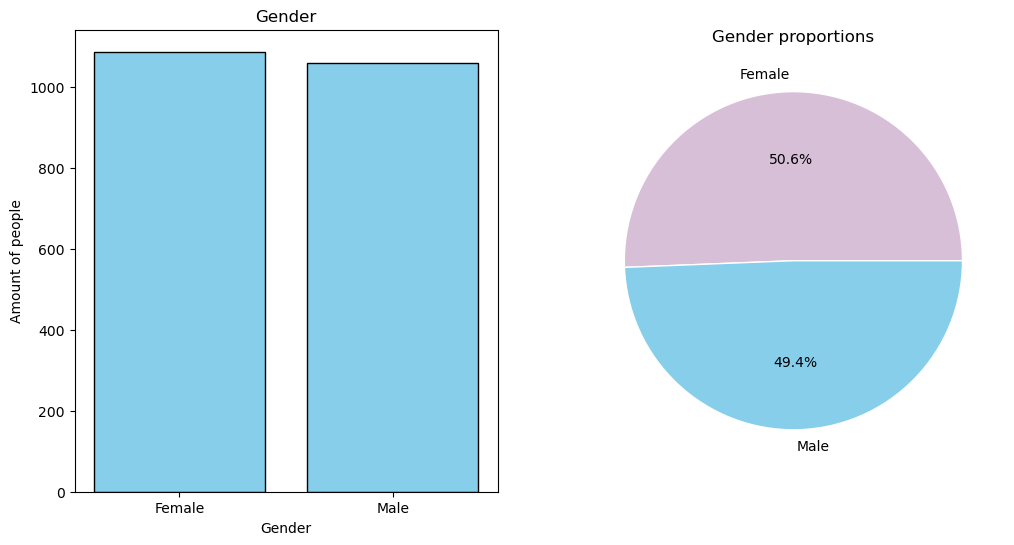

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(['Female', 'Male'], gender_counts, color='skyblue', edgecolor='black')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Amount of people')

plt.subplot(122)
plt.pie(gender_counts, labels=['Female', 'Male'], 
        autopct='%1.1f%%', 
        colors=['thistle', 'skyblue'], 
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title('Gender proportions')

Podemos observar también que la distribución de géneros es también muy equilibrada, teniendo prácticamente la misma proporción de hombres que de mujeres. 

Hacemos lo mismo con la etnia del grupo:

In [12]:
ethnic_count = df['Ethnicity'].value_counts()
ethnic_count

Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64

Nota: 
- 0: Caucasian
- 1: African American
- 2: Asian
- 3: Other

Text(0.5, 1.0, 'Ethnic proportions')

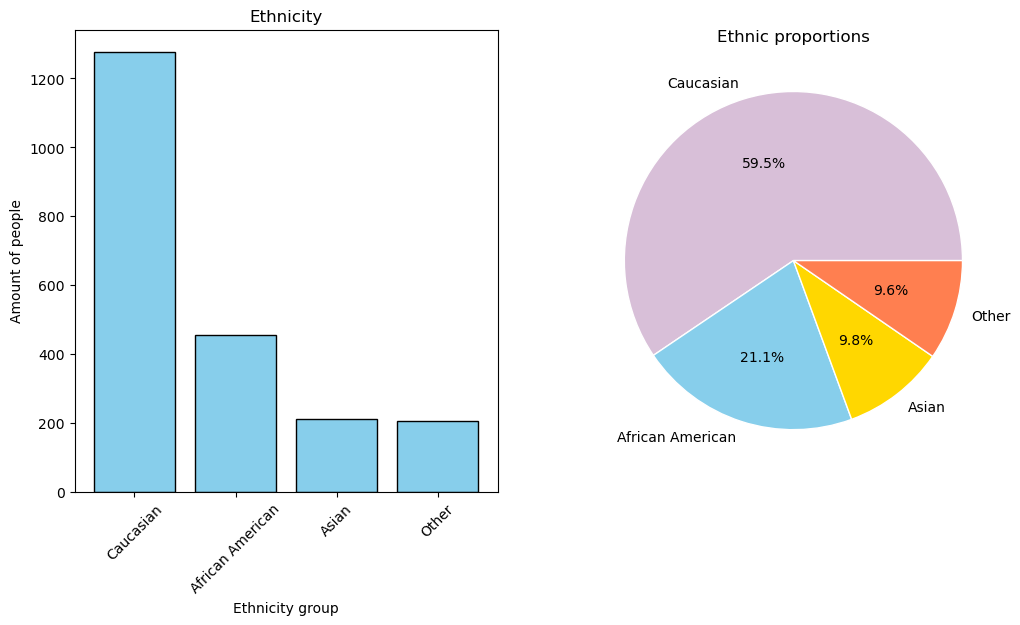

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(['Caucasian', 'African American', 'Asian', 'Other'], ethnic_count, color='skyblue', edgecolor='black')
plt.title('Ethnicity')
plt.xlabel('Ethnicity group')
plt.ylabel('Amount of people')
plt.xticks(rotation=45)

plt.subplot(122)
plt.pie(ethnic_count, labels=['Caucasian', 'African American', 'Asian', 'Other'], 
        autopct='%1.1f%%', 
        colors=['thistle', 'skyblue', 'gold', 'coral'], 
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title('Ethnic proportions')

En este caso podemos ver que el grupo estudiado no es el más parejo ni abarcativo porque es muy desproporcionada la agrupación de grupos etnicos: tiene un enfoque predominantemente caucásico. 

Finalmente analizo cómo se compone educativamente el dataset.

In [14]:
education_groups = df['EducationLevel'].value_counts()

Nota:
- 0: None
- 1: High School
- 2: Bachelor's
- 3: Higher

Text(0.5, 1.0, 'Gender proportions')

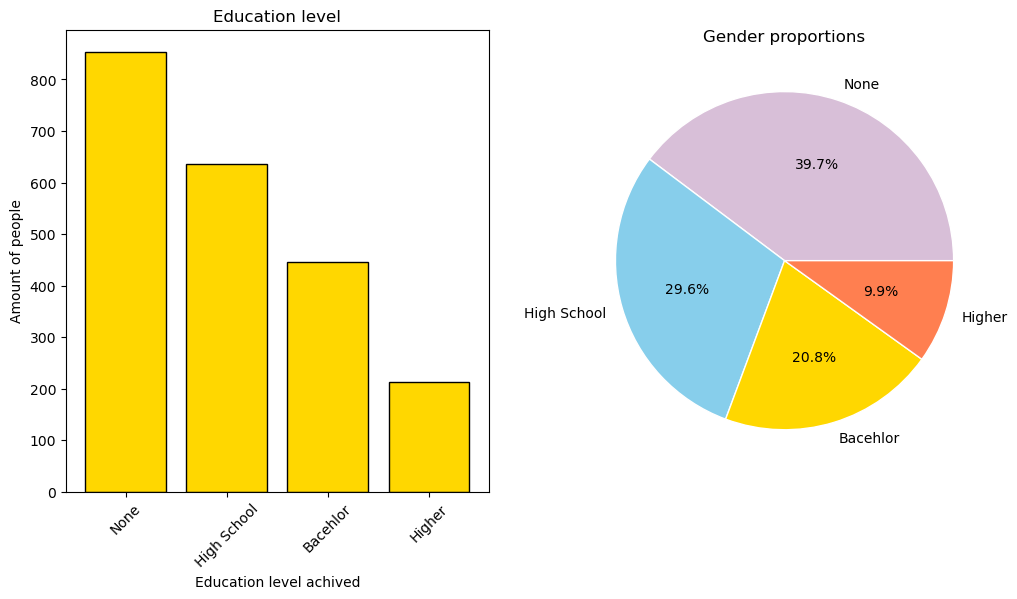

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(['None', 'High School', 'Bacehlor', 'Higher'], education_groups, color='gold', edgecolor='black')
plt.title('Education level')
plt.xlabel('Education level achived')
plt.ylabel('Amount of people')
plt.xticks(rotation=45)

plt.subplot(122)
plt.pie(education_groups, labels=['None', 'High School', 'Bacehlor', 'Higher'], 
        autopct='%1.1f%%', 
        colors=['thistle', 'skyblue', 'gold', 'coral'], 
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title('Gender proportions')

En este caso, podemos ver una desproporción en cuanto a la composición educativa del dataset. Sin embargo, si analizamos que la cantidad de personas sin estudios y con algún nivel educativo, es similar.

Hasta ahora, a modo de resumen podemos concluir de éste dataset:
- Buena distribución de edades ✅
- Buena distribución de géneros ✅
- Distribución étnica poco pareja, dado que se enfoca en la étnia caucásica ⚠


---

## Análisis de variables ambientales y de estilo de vida

Seguimos usando un poco de estadística descriptiva básica para estudiar la composición del dataset, ahora con datos un poco más interesantes: relacionados con el estilo de vida y con factores ambientales.

### 🚬 Consumo de tabaco

In [16]:
tabaco_consumption = pd.Series(df['Smoking'].value_counts())

([<matplotlib.patches.Wedge at 0x7be1e2b7b430>,
 [Text(-0.678269118416429, 0.8659971148927693, 'Not a smoker'),
  Text(0.6782691941243016, -0.8659970555965941, 'Smoker')],
 [Text(-0.3699649736816885, 0.4723620626687832, '71.1%'),
  Text(0.36996501497689177, -0.4723620303254149, '28.9%')])

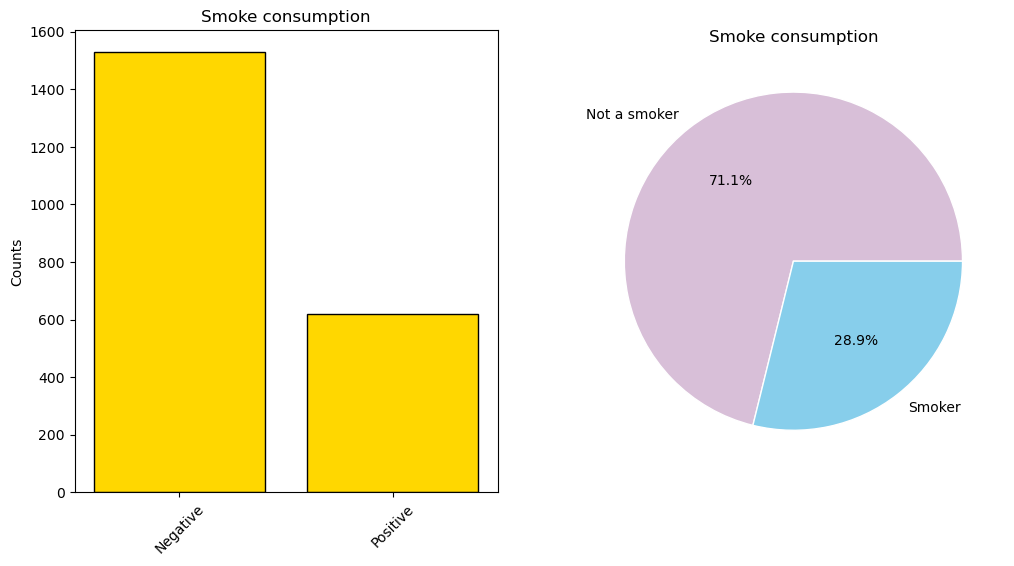

In [17]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(['Negative', 'Positive'], tabaco_consumption, color='gold', edgecolor='black')
plt.title('Smoke consumption')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.subplot(122)
plt.title('Smoke consumption')
plt.pie(tabaco_consumption, labels=['Not a smoker', 'Smoker'], 
        autopct='%1.1f%%', 
        colors=['thistle', 'skyblue'], 
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})

Se observa que la mayoría de los sujetos estudiados no son fumadores.

### Análisis del índice de masa corporal

In [18]:
bmi = df['BMI']

# analizamos las estadísticas descriptivas de los BMI
bmi_stats = bmi.describe()
print(bmi_stats)

bmi.median()

count    2149.000000
mean       27.655697
std         7.217438
min        15.008851
25%        21.611408
50%        27.823924
75%        33.869778
max        39.992767
Name: BMI, dtype: float64


27.82392368946317

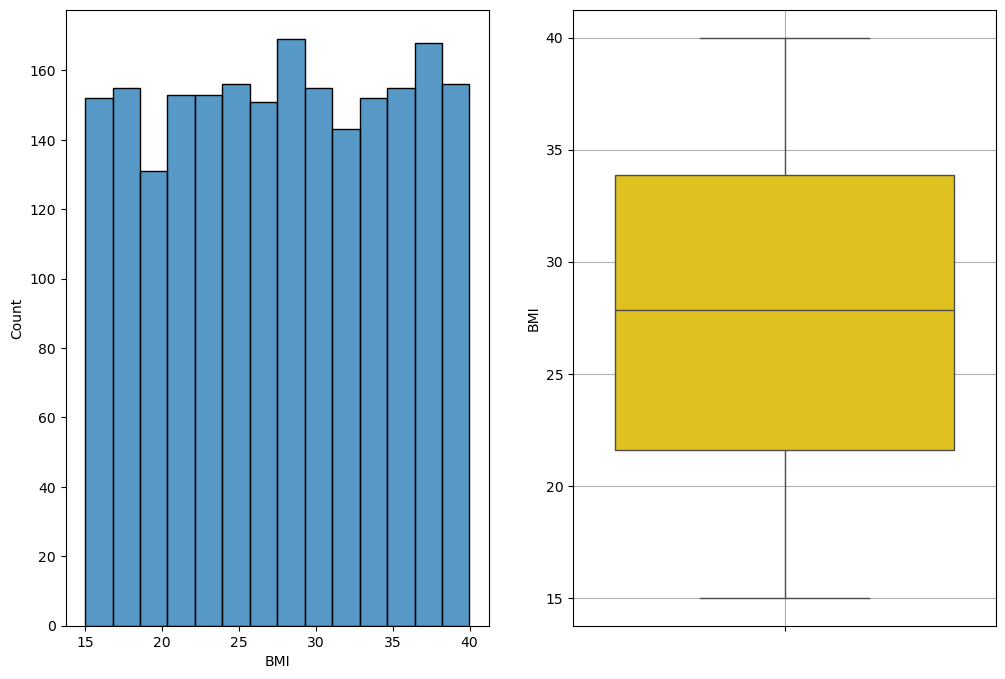

In [19]:
# observamos la tendencia con un histograma
plt.figure(figsize=(12,8))

plt.subplot(121)
sns.histplot(
    data=bmi
)

plt.subplot(122)
sns.boxplot(
    data=bmi,
    color='gold'
)

plt.grid()
plt.show()

Podemos notar que la distribución de ínidices de masa corporal es normal y simétrica respecto a la media. 

Con respecto a la media, que se valúa en 27.65, esto significa que en promedio, los sujetos observados se encuentran en sobrepeso, ya que según datos del CDC:
- Underweight: BMI is less than 18.5
- Healthy weight: BMI is 18.5 to less than 25
- <mark>Overweight: BMI is 25 to less than 30</mark>
- Obesity: BMI is 30 or greater
  - Class 1 obesity: BMI is 30 to less than 35
  - Class 2 obesity: BMI is 35 to less than 40
  - Class 3 obesity: BMI is 40 or greater

Se tiene una desviación estándar importante (valuada en 7.21 aproximadamente), lo que sugiere que los datos varían significativamente respecto a la media. Podemos notar que, si bien es una distribución simétrica en la que la media es similar a la mediana, los datos varían significativamente y **se observa una tendencia importante a la obesidad**, dado que el 75% de los datos se encuentran por debajo de un IMC de 33, lo que sugiere una obesidad clase 1.

En este aspecto, el dataset no es del todo parejo o adecuado para el estudio, dado que se tendrá un sesgo en dirección a los pacientes con obesidad.

In [20]:
xp = np.linspace(bmi_stats['min'], bmi_stats['max'])
yp = scipy.stats.norm(bmi_stats['mean'], bmi_stats['std']).cdf(xp)

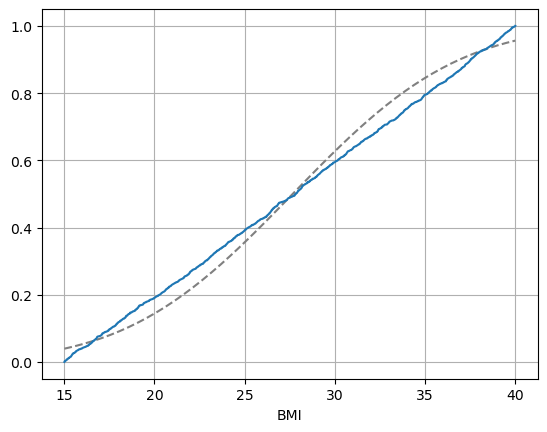

In [21]:
plt.plot(xp,yp, color='gray', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    bmi,
    normalize=True
).plot()

plt.grid()

Corroboramos graficando los datos normalizados, en base a una función de distribución acumulada (línea azul) comparada con una distribución normal acumulada (línea punteada gris) que los datos no tienen una distribución normal, dado que en algunos puntos estos se encuentran por encima de la distribución normal y en otros por debajo.

### **Consumo de alcohol 🍷**

Esta variable en el dataset está definida como consumo semanal de alcohol en unidades y tiene un rango entre 0 (ninguna unidad) y 20 (unidades). 

In [22]:
alcohol_consumption = df['AlcoholConsumption']
alcohol_consumption.describe()

count    2149.000000
mean       10.039442
std         5.757910
min         0.002003
25%         5.139810
50%         9.934412
75%        15.157931
max        19.989293
Name: AlcoholConsumption, dtype: float64

Según datos de la NHS se considera que a partir de las 14 unidades de alcohol se considera como un consumo problemático. Podemos ver en base a las estadísticas descriptivas básicas que el promedio bebe 10 unidades. La media y la mediana son similares por lo que aparenta ser una distribución simétrica. 

Se observa que el 75% de los datos se encuentra por debajo de las 15.15 unidades, lo que sobrepasa la cantidad recomendada.

Observamos el histograma y el diagrama de caja.

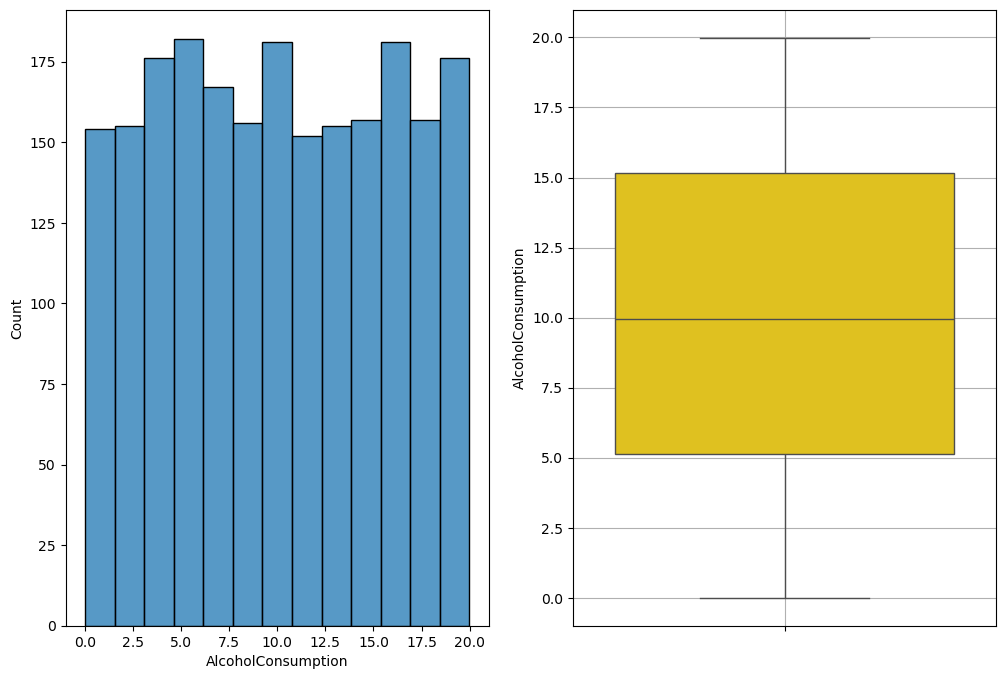

In [23]:
plt.figure(figsize=(12,8))

plt.subplot(121)
sns.histplot(
    data=alcohol_consumption
)

plt.subplot(122)
sns.boxplot(
    data=alcohol_consumption,
    color='gold'
)

plt.grid()
plt.show()

Se observa una distribución simétrica, pero centrada en un consumo semanal constante. 

## Analizamos la actividad física 🏃‍♀️

El dataset nos presenta la cantidad de horas de actividad física semanales. Observamos como se compone el dataset en este sentido.

In [24]:
df['PhysicalActivity'].describe()

count    2149.000000
mean        4.920202
std         2.857191
min         0.003616
25%         2.570626
50%         4.766424
75%         7.427899
max         9.987429
Name: PhysicalActivity, dtype: float64

Considerando que según datos del CDC, que recomienda un mínimo de 2.5 horas a la semana, observamos que el conjuto cumple casi perfectamente este mínimo requerido: se tiene una media de casi 5 horas a la semana, con un dato interesante: el 25% más bajo de los datos cumple perfectamente la mínima semanal de horas a la semana. 

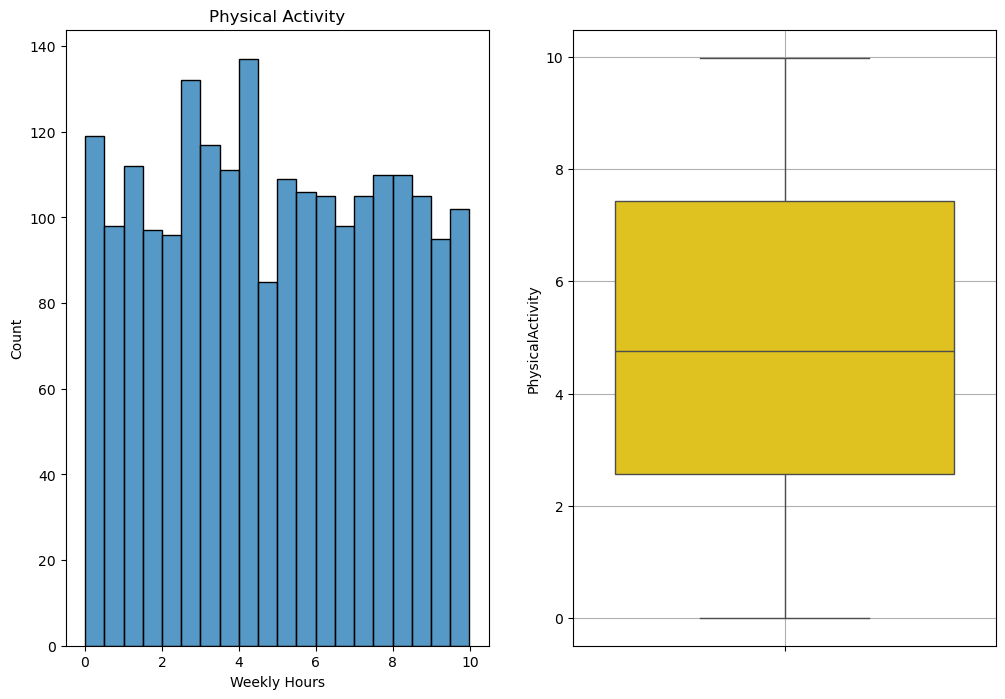

In [25]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.title('Physical Activity')
sns.histplot(
    data=df['PhysicalActivity'],
    bins=20
)
plt.xlabel('Weekly Hours')

plt.subplot(122)
sns.boxplot(
    data=df['PhysicalActivity'],
    color='gold'
)

plt.grid()
plt.show()

El conjunto de datos en torno a la actividad física se centra en sujetos que se mantienen activos físicamente, cumpliendo en su mayoría el mínimo de horas de actividad física a la semana.

### Hábitos alimenticios 🥬

Los datos relacionados a los consumos alimenticios, se agrupan en un índice que puntúa la calidad de la dieta del sujeto en valores del 0 al 10, siendo 0 una dieta de muy mala calidad.

In [26]:
df['DietQuality'].describe()

count    2149.000000
mean        4.993138
std         2.909055
min         0.009385
25%         2.458455
50%         5.076087
75%         7.558625
max         9.998346
Name: DietQuality, dtype: float64

Se establece una media ubicada justo al medio del índice, con una desviación estándar de casi 3, lo que establece que si bien es una distribución simétrica, los datos podrían tener cierta dispersión.
Graficamos:

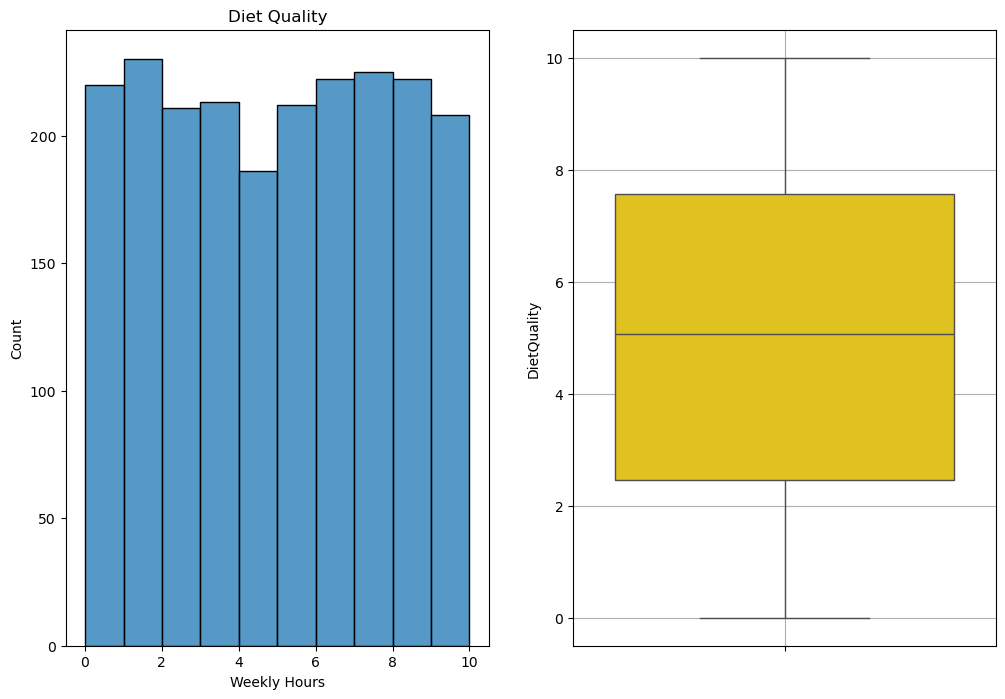

In [27]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.title('Diet Quality')
sns.histplot(
    data=df['DietQuality'],
    bins=10
)
plt.xlabel('Weekly Hours')

plt.subplot(122)
sns.boxplot(
    data=df['DietQuality'],
    color='gold'
)

plt.grid()
plt.show()

A diferencia de los datos relacionados con la actividad física, se observa que los datos relacionados con los hábitos alimenticios no tienen un comportamiento ideal, dado que en promedio las observaciones se encuentran mostrando una dieta regular.

## Análisis de la calidad del sueño 🛌

Las observaciones relacionadas con la calidad del sueño se describen en un índice que puntúa a la misma en valores entre 4 y 10. 

Analizamos las estadísticas descriptivas básicas:

In [28]:
df['SleepQuality'].describe()

count    2149.000000
mean        7.051081
std         1.763573
min         4.002629
25%         5.482997
50%         7.115646
75%         8.562521
max         9.999840
Name: SleepQuality, dtype: float64

Si graficamos:

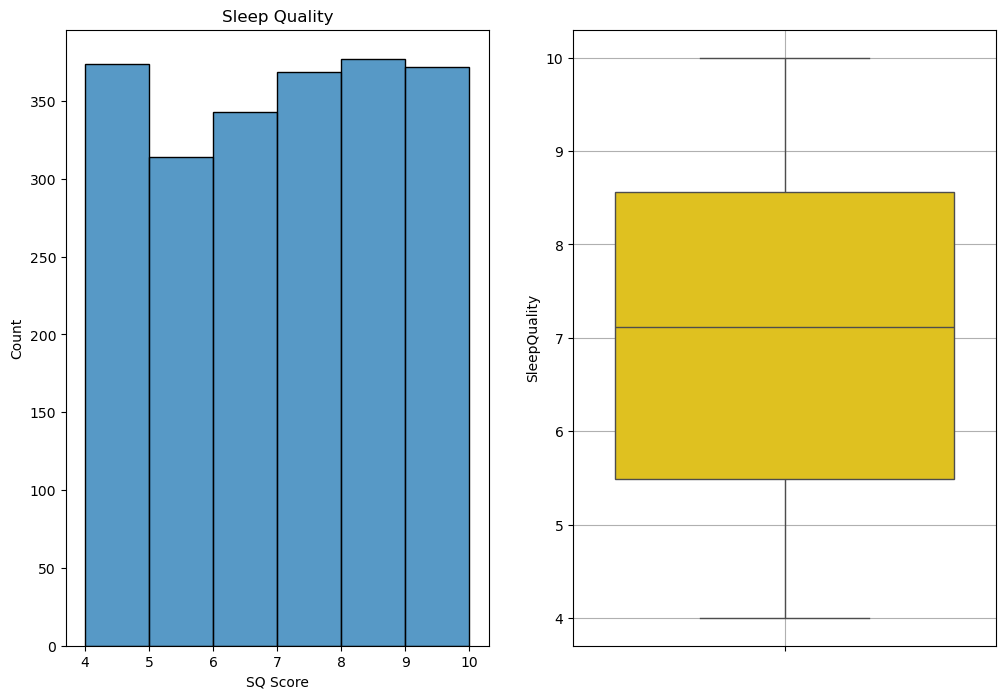

In [31]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.title('Sleep Quality')
sns.histplot(
    data=df['SleepQuality'],
    bins=6
)
plt.xlabel('SQ Score')

plt.subplot(122)
sns.boxplot(
    data=df['SleepQuality'],
    color='gold'
)

plt.grid()
plt.show()

Podemos observar la calidad del sueño en promedio se encuentra levemente por encima del valor regular, con un desvío que sugiere que los datos varían con respecto a la media. Si bien no es una distribución normal, se tiene una buena muestra variada en cuanto a la calidad del sueño.

A modo de resumen, con lo analizado obtenidos hasta ahora, este dataset se compone de:
- 👴 Grupo de personas en la tercera edad
- ♀ Buena proporción de ambos géneros
- ❌ La distribución étnica está centrada en caucásicos
- 🚬 La gran mayoría no fuma 
- 🍺 El consumo de alcohol es elevado pero dentro de los valores considerados saludables
- 🏋️‍♀️ La mayoría de los sujetos realiza el mínimo recomendado de actividad física semanal
- 🍔 La calidad de la dieta es regular
- 🌒 La calidad del sueño también es regular
